###### Goal - The following notebook is written to plot the Van Genuchten parameters with different alpha, n, wr, smoothing interval values. This is later on going to be used in the parameter sensitivity analysis.

* Write down the values that have been considered!
* Physical significance of each parameter (Written based on experience and expert judgement)
* alpha - Value at which air entry suction is considered. Higher the alpha value --> lower is the air entry suction pressure i.e the curve drops. The alpha order: Peat > Mineral 
* n - Shape of the SWC. It is based on the pore size distribution.  n varies from 1.01 - 3 where 1.01 - Clay [Slowly allows water to be released]. The n order: Bedrock > Mineral > Peat 
* wr - Residual saturation that remains in the soil [soil water that adheres to the soil particles] 0.05 - 0.2 where 0.05 - Peat and 0.2 could be clay. The wr order: Clay > Sand > ..

--------------

* When alpha value variation is considered, {n = 1.4, wres = 0.1} since the soil in Yakou has more clay
* When n value variation is considered, {alpha = 0.001 (Okay?), wres = 0.1}
* When wres value variation is considered, {alpha = 0.001 (Okay?), n = 1.4}


In [177]:
import plot_wrm
import matplotlib.pyplot as plt
import numpy as np
import colors

### Example:

In [121]:
# Creating an object for the peat material [based on freezeup.xml]
alpha_peat = 0.0005
n_peat = 1.39
wres_peat = 0.05
smoothing_interval_peat = 0.05
peat_VGc = plot_wrm.VanGenuchten(alpha=alpha_peat,n=n_peat,sr=wres_peat,smoothing_interval_sat=smoothing_interval_peat)

In [122]:
# Creating an object for the mineral material [based on freezeup.xml]
alpha_mineral = 2e-5
n_mineral = 1.58
wres_mineral = 0.2
smoothing_interval_mineral = 0.05
mineral_VGc = plot_wrm.VanGenuchten(alpha=alpha_mineral,n=n_mineral,sr=wres_mineral,smoothing_interval_sat=smoothing_interval_mineral)

In [123]:
mineral_VGc.short_label()

'VG: a=2.00e-05 [1/Pa], n=1.6, sr=0.2'

<AxesSubplot:xlabel='saturation [-]', ylabel='capillary pressure [Pa]'>

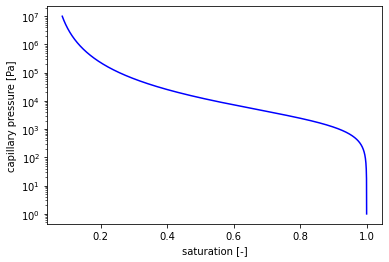

In [124]:
fig,ax1 = plt.subplots(1,1,squeeze=True)
plot_wrm.plot(peat_VGc,ax=ax1)
#plot_wrm.plot(mineral_VGc,ax=ax1)

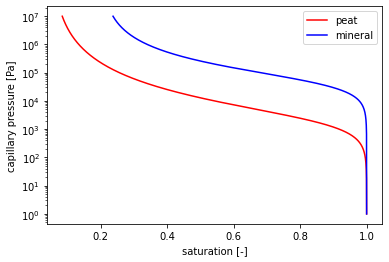

In [7]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,ax = plt.subplots(1,1,squeeze=True)

s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81


ax.semilogy(s_peat, pc, color='r', label='peat')
ax.semilogy(s_mineral, pc, color='b', label='mineral')
plt.xlabel("saturation [-]")
plt.ylabel("capillary pressure [Pa]")
plt.legend()

### Plotting the Pressure Vs Saturation curve:

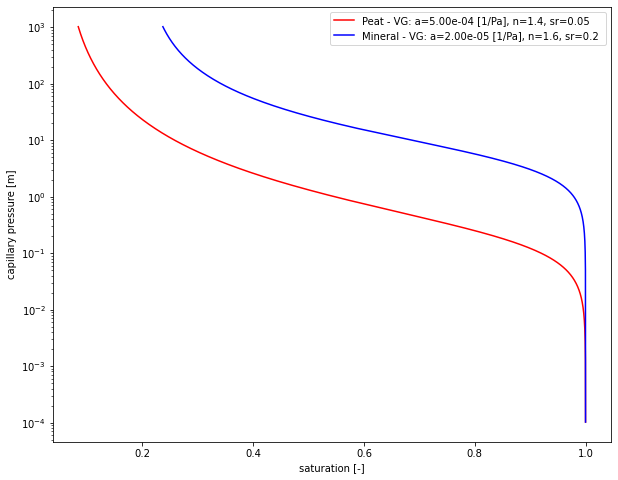

In [13]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,ax = plt.subplots(1,1,squeeze=True)

fig.set_size_inches(10, 8)

s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81


ax.semilogy(s_peat, pc_m, color='r', label=f'Peat - {peat_VGc.short_label()} ')
ax.semilogy(s_mineral, pc_m, color='b', label=f'Mineral - {mineral_VGc.short_label()} ')
plt.xlabel("saturation [-]")
plt.ylabel("capillary pressure [m]")
plt.legend()

Comments:
- Peat loses water easily since the value of alpha is higher
- The residual saturation of peat is lower and hence has a greater range for saturation.

### Plotting Permeability Vs Saturation curve

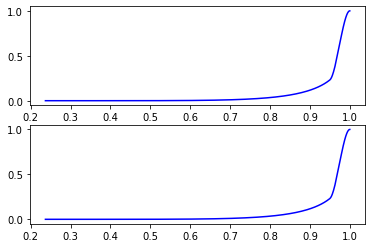

In [41]:
fig,(ax1,ax2) = plt.subplots(2,1,squeeze=True)
plot_wrm.plot_kr(peat_VGc,ax=ax1)
plot_wrm.plot_kr(mineral_VGc,ax=ax2)

Comments:
- Improve the plotting style! - Add both labels in one figure, Increase the size of the figure
- Add the kr variable also towards the right of the figure

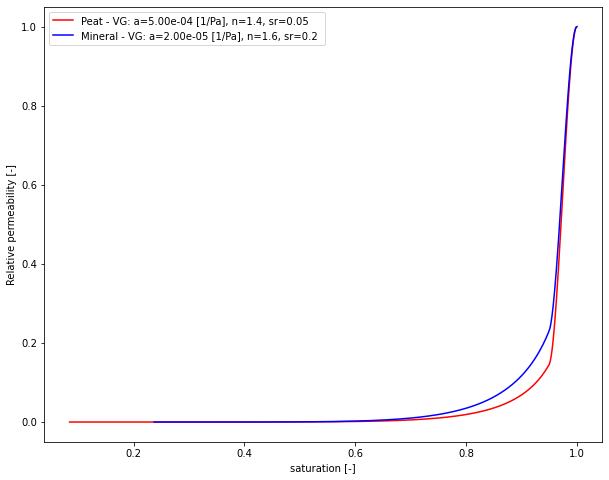

In [25]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,ax = plt.subplots(1,1,squeeze=True)

fig.set_size_inches(10, 8)

# Calculating the saturation
s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating the relative permeability
kr_peat = np.array([peat_VGc.k_relative(s) for s in s_peat])
kr_mineral = np.array([mineral_VGc.k_relative(s) for s in s_mineral])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81


ax.plot(s_peat, kr_peat, color='r', label=f'Peat - {peat_VGc.short_label()} ')
ax.plot(s_mineral, kr_mineral, color='b', label=f'Mineral - {mineral_VGc.short_label()} ')
plt.xlabel("saturation [-]")
plt.ylabel("Relative permeability [-]")
plt.legend()

### Plotting (Capillary pressure vs Saturation) & (Relative permeability vs Saturation)

Text(0, 0.5, 'Relative permeability [-]')

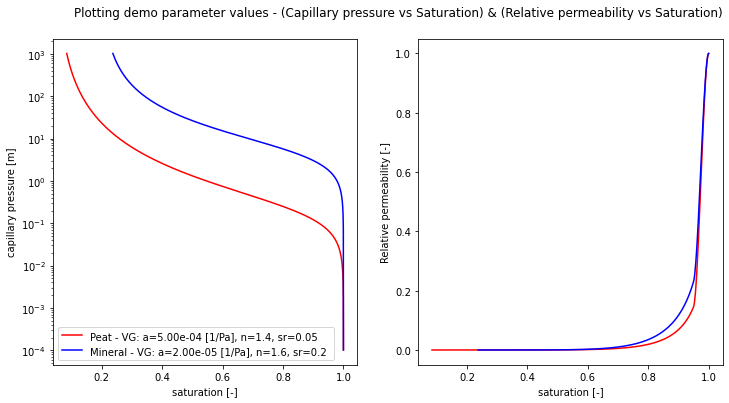

In [48]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title('Plotting demo parameter values - (Capillary pressure vs Saturation) & (Relative permeability vs Saturation)', loc='right',y=1.05)

# Calculating the saturation
s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating the relative permeability
kr_peat = np.array([peat_VGc.k_relative(s) for s in s_peat])
kr_mineral = np.array([mineral_VGc.k_relative(s) for s in s_mineral])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81

ax1.semilogy(s_peat, pc_m, color='r', label=f'Peat - {peat_VGc.short_label()} ')
ax1.semilogy(s_mineral, pc_m, color='b', label=f'Mineral - {mineral_VGc.short_label()} ')
ax1.set_xlabel("saturation [-]")
ax1.set_ylabel("capillary pressure [m]")
ax1.legend()


ax2.plot(s_peat, kr_peat, color='r', label=f'Peat - {peat_VGc.short_label()} ')
ax2.plot(s_mineral, kr_mineral, color='b', label=f'Mineral - {mineral_VGc.short_label()} ')
ax2.set_xlabel("saturation [-]")
ax2.set_ylabel("Relative permeability [-]")
#ax2.legend()

### Plotting the parameters with a range of values as per literature:

In [137]:
### Writing the code for plotting - Based on plotting_wrm
def plot_capsatkr(alpha, n, sr, smoothing_interval, ax1, ax2, y_units, label,color):
    
    # Creating a pressure column
    pc = np.linspace(0,7,1000)
    pc = 10**pc
    
    # Creating a wrm object
    
    wrm = plot_wrm.VanGenuchten(alpha=alpha,n=n,sr=sr,smoothing_interval_sat=smoothing_interval)
    
    # Calculating the saturation
    sat = np.array([wrm.saturation(apc) for apc in pc])
    
    # Calculating the relative permeability
    kr = np.array([wrm.k_relative(s) for s in sat])
    
    
    # Deciding on the units
    if y_units == 'hPa':
        pc = pc / 100.
    elif y_units == 'm':
        pc = pc / 1000 / 9.81
    elif y_units == 'cm':
        pc = pc / 1000 / 9.81 * 100
    elif y_units == 'Pa':
        pass
    else:
        raise ValueError("Invalid units for yaxis, must be one of [Pa, m, cm, hPa]")
    
    
    # Plotting the saturation and capillary pressure
    ax1.semilogy(sat, pc, color=color, label=label)
    ax1.set_xlabel("Saturation [-]")
    ax1.set_ylabel("Capillary pressure [{}]".format(y_units))
    ax1.legend()
    
    # Plotting the saturation and relative permeability
    ax2.plot(sat, kr, color=color, label=label)
    ax2.set_xlabel("Saturation [-]")
    ax2.set_ylabel("Relative permeability [-]")
    

In [225]:
# Entering the parameters as a list to later access while plotting
alpha_peat_values = [0.0005, 0.001, 0.01, 0.02, 0.05]
n_peat_values = [1.05, 1.2, 1.4, 1.6, 2] 
sr_peat_values = [0.05, 0.1, 0.12, 0.15, 0.2]
smoothing_interval_peat_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]


# Note that values of n <= 1 is not possible

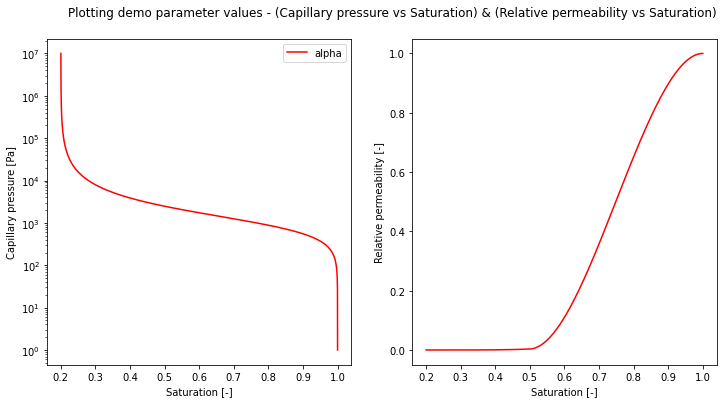

In [176]:
# Check for varying the parameters 
alpha_peat = 0.001
n_peat = 2
wres_peat = 0.2
smoothing_interval_peat = 0.5

fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title('Plotting demo parameter values - (Capillary pressure vs Saturation) & (Relative permeability vs Saturation)', loc='right',y=1.05)


plot_capsatkr(alpha=alpha_peat,n=n_peat,sr=wres_peat,smoothing_interval=smoothing_interval_peat,ax1=ax1,ax2=ax2,y_units='Pa', label=label,color=color_label)

In [193]:
alpha_peat_values[4]

0.01

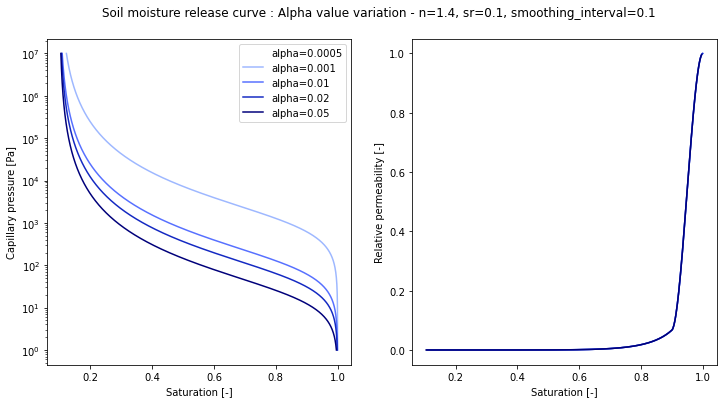

In [221]:
### Plotting all the alpha parameter variation:
fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title(f'Soil moisture release curve : Alpha value variation - n={n_peat_values[2]}, sr={sr_peat_values[1]}, smoothing_interval={smoothing_interval_peat_value[1]}', loc='right',y=1.05,x=0.8)

#color_label = colors.cm_mapper(vmin=alpha_peat_values[0], vmax=alpha_peat_values[4], cmap=colors.water_cmap())

color_label = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.water_cmap())

for i, value in enumerate(alpha_peat_values):
    plot_capsatkr(alpha=value,n=n_peat_values[2],sr=sr_peat_values[1],smoothing_interval=smoothing_interval_peat_value[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'alpha={value}',color=color_label(i))

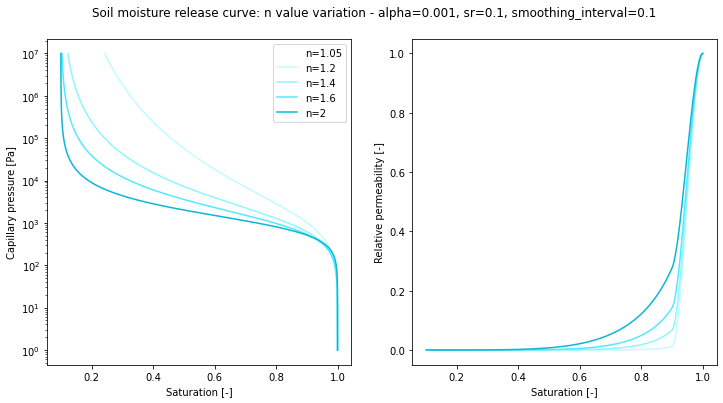

In [222]:
### Plotting all the alpha parameter variation:
fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title(f'Soil moisture release curve: n value variation - alpha={alpha_peat_values[1]}, sr={sr_peat_values[1]}, smoothing_interval={smoothing_interval_peat_value[1]}', loc='right',y=1.05,x=0.8)

#color_label = colors.cm_mapper(vmin=alpha_peat_values[0], vmax=alpha_peat_values[4], cmap=colors.water_cmap())

color_label = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.ice_cmap())

for i, value in enumerate(n_peat_values):
    plot_capsatkr(alpha=alpha_peat_values[1],n=value,sr=sr_peat_values[1],smoothing_interval=smoothing_interval_peat_value[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'n={value}',color=color_label(i))

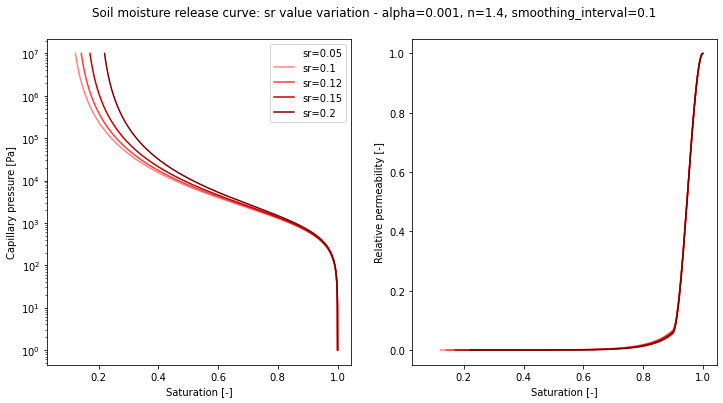

In [223]:
### Plotting all the alpha parameter variation:
fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title(f'Soil moisture release curve: sr value variation - alpha={alpha_peat_values[1]}, n={n_peat_values[2]}, smoothing_interval={smoothing_interval_peat_value[1]}', loc='right',y=1.05,x=0.8)

#color_label = colors.cm_mapper(vmin=alpha_peat_values[0], vmax=alpha_peat_values[4], cmap=colors.water_cmap())

color_label = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.gas_cmap())

for i, value in enumerate(sr_peat_values):
    plot_capsatkr(alpha=alpha_peat_values[1],n=n_peat_values[2],sr=value,smoothing_interval=smoothing_interval_peat_value[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'sr={value}',color=color_label(i))

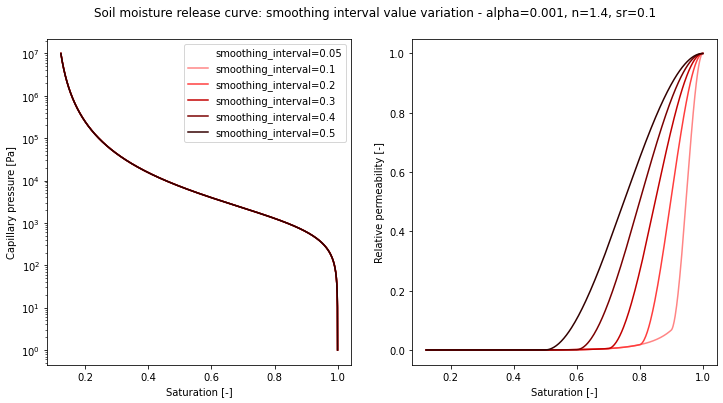

In [232]:
### Plotting all the alpha parameter variation:
fig,(ax1,ax2) = plt.subplots(1,2,squeeze=True)

fig.set_size_inches(12, 6)

plt.title(f'Soil moisture release curve: smoothing interval value variation - alpha={alpha_peat_values[1]}, n={n_peat_values[2]}, sr={sr_peat_values[1]}', loc='right',y=1.05,x=0.8)

#color_label = colors.cm_mapper(vmin=alpha_peat_values[0], vmax=alpha_peat_values[4], cmap=colors.water_cmap())

color_label = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.gas_cmap())

for i, value in enumerate(smoothing_interval_peat_values):
    plot_capsatkr(alpha=alpha_peat_values[1],n=n_peat_values[2],sr=sr_peat_values[1],smoothing_interval=value,ax1=ax1,ax2=ax2,y_units='Pa', label=f'smoothing_interval={value}',color=color_label(i))

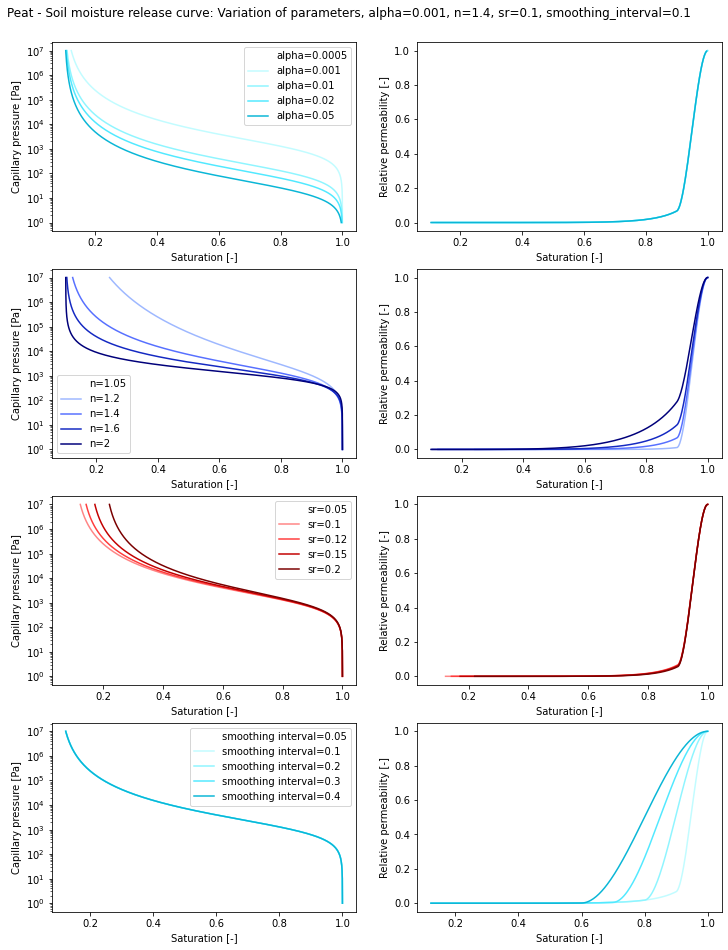

In [262]:
### Plotting all the values in one plot:
### Plotting all the alpha parameter variation:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,squeeze=True)

fig.set_size_inches(12, 16)

plt.title(f'Peat - Soil moisture release curve: Variation of parameters, alpha={alpha_peat_values[1]}, n={n_peat_values[2]}, sr={sr_peat_values[1]}, smoothing_interval={smoothing_interval_peat_values[1]}', loc='right',y=4.7,x=0.9)

#color_label = colors.cm_mapper(vmin=alpha_peat_values[0], vmax=alpha_peat_values[4], cmap=colors.water_cmap())

color_label_gas = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.gas_cmap())
color_label_ice = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.ice_cmap())
color_label_water = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.water_cmap())

for i in range(5):
    plot_capsatkr(alpha=alpha_peat_values[i],n=n_peat_values[2],sr=sr_peat_values[1],smoothing_interval=smoothing_interval_peat_values[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'alpha={alpha_peat_values[i]}',color=color_label_ice(i))
    plot_capsatkr(alpha=alpha_peat_values[1],n=n_peat_values[i],sr=sr_peat_values[1],smoothing_interval=smoothing_interval_peat_values[1],ax1=ax3,ax2=ax4,y_units='Pa', label=f'n={n_peat_values[i]}',color=color_label_water(i))
    plot_capsatkr(alpha=alpha_peat_values[1],n=n_peat_values[2],sr=sr_peat_values[i],smoothing_interval=smoothing_interval_peat_values[1],ax1=ax5,ax2=ax6,y_units='Pa', label=f'sr={sr_peat_values[i]}',color=color_label_gas(i))
    plot_capsatkr(alpha=alpha_peat_values[1],n=n_peat_values[2],sr=sr_peat_values[1],smoothing_interval=smoothing_interval_peat_values[i],ax1=ax7,ax2=ax8,y_units='Pa', label=f'smoothing interval={smoothing_interval_peat_values[i]}',color=color_label_ice(i))
    
    
plt.savefig('SWCC_variation_params_peat.png',dpi=300)   

In [261]:
# Entering the parameters as a list to later access while plotting
alpha_mineral_values = [2e-05, 2e-04, 2e-03, 0.007, 0.01]
n_mineral_values = [1.05, 1.2, 1.4, 1.6, 2] 
sr_mineral_values = [0.01, 0.05, 0.07, 0.1, 0.2]
smoothing_interval_mineral_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

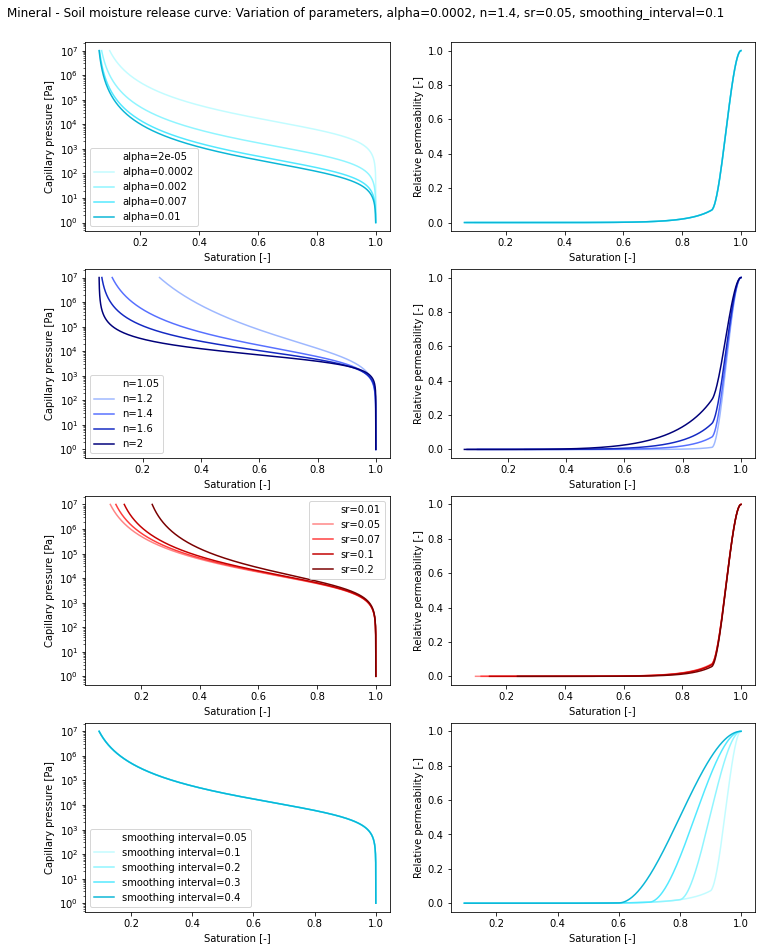

In [264]:
### Plotting all the values in one plot:
### Plotting all the alpha parameter variation:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,squeeze=True)

fig.set_size_inches(12, 16)

plt.title(f'Mineral - Soil moisture release curve: Variation of parameters, alpha={alpha_mineral_values[1]}, n={n_mineral_values[2]}, sr={sr_mineral_values[1]}, smoothing_interval={smoothing_interval_mineral_values[1]}', loc='right',y=4.7,x=0.9)

#color_label = colors.cm_mapper(vmin=alpha_mineral_values[0], vmax=alpha_mineral_values[4], cmap=colors.water_cmap())

color_label_gas = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.gas_cmap())
color_label_ice = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.ice_cmap())
color_label_water = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.water_cmap())

for i in range(5):
    plot_capsatkr(alpha=alpha_mineral_values[i],n=n_mineral_values[2],sr=sr_mineral_values[1],smoothing_interval=smoothing_interval_mineral_values[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'alpha={alpha_mineral_values[i]}',color=color_label_ice(i))
    plot_capsatkr(alpha=alpha_mineral_values[1],n=n_mineral_values[i],sr=sr_mineral_values[1],smoothing_interval=smoothing_interval_mineral_values[1],ax1=ax3,ax2=ax4,y_units='Pa', label=f'n={n_mineral_values[i]}',color=color_label_water(i))
    plot_capsatkr(alpha=alpha_mineral_values[1],n=n_mineral_values[2],sr=sr_mineral_values[i],smoothing_interval=smoothing_interval_mineral_values[1],ax1=ax5,ax2=ax6,y_units='Pa', label=f'sr={sr_mineral_values[i]}',color=color_label_gas(i))
    plot_capsatkr(alpha=alpha_mineral_values[1],n=n_mineral_values[2],sr=sr_mineral_values[1],smoothing_interval=smoothing_interval_mineral_values[i],ax1=ax7,ax2=ax8,y_units='Pa', label=f'smoothing interval={smoothing_interval_mineral_values[i]}',color=color_label_ice(i))
    
    
plt.savefig('SWCC_variation_params_mineral.png',dpi=300)   

In [265]:
# Entering the parameters as a list to later access while plotting
alpha_bedrock_values = [0.001, 0.03, 0.05, 0.1, 0.2]
n_bedrock_values = [1.05, 1.5, 2, 2.5, 3] 
sr_bedrock_values = [0.01, 0.05, 0.07, 0.09, 0.1]
smoothing_interval_bedrock_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

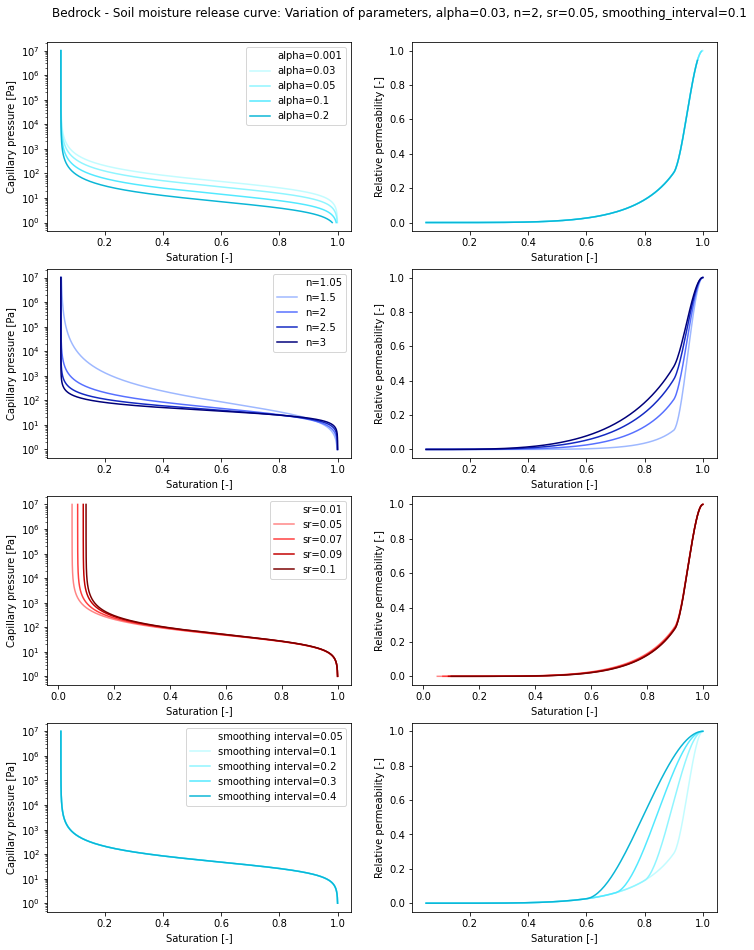

In [268]:
### Plotting all the values in one plot:
### Plotting all the alpha parameter variation:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,squeeze=True)

fig.set_size_inches(12, 16)

plt.title(f'Bedrock - Soil moisture release curve: Variation of parameters, alpha={alpha_bedrock_values[1]}, n={n_bedrock_values[2]}, sr={sr_bedrock_values[1]}, smoothing_interval={smoothing_interval_bedrock_values[1]}', loc='right',y=4.7,x=1.1)

#color_label = colors.cm_mapper(vmin=alpha_bedrock_values[0], vmax=alpha_bedrock_values[4], cmap=colors.water_cmap())

color_label_gas = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.gas_cmap())
color_label_ice = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.ice_cmap())
color_label_water = colors.cm_mapper(vmin=0.0, vmax=5.0, cmap=colors.water_cmap())

for i in range(5):
    plot_capsatkr(alpha=alpha_bedrock_values[i],n=n_bedrock_values[2],sr=sr_bedrock_values[1],smoothing_interval=smoothing_interval_bedrock_values[1],ax1=ax1,ax2=ax2,y_units='Pa', label=f'alpha={alpha_bedrock_values[i]}',color=color_label_ice(i))
    plot_capsatkr(alpha=alpha_bedrock_values[1],n=n_bedrock_values[i],sr=sr_bedrock_values[1],smoothing_interval=smoothing_interval_bedrock_values[1],ax1=ax3,ax2=ax4,y_units='Pa', label=f'n={n_bedrock_values[i]}',color=color_label_water(i))
    plot_capsatkr(alpha=alpha_bedrock_values[1],n=n_bedrock_values[2],sr=sr_bedrock_values[i],smoothing_interval=smoothing_interval_bedrock_values[1],ax1=ax5,ax2=ax6,y_units='Pa', label=f'sr={sr_bedrock_values[i]}',color=color_label_gas(i))
    plot_capsatkr(alpha=alpha_bedrock_values[1],n=n_bedrock_values[2],sr=sr_bedrock_values[1],smoothing_interval=smoothing_interval_bedrock_values[i],ax1=ax7,ax2=ax8,y_units='Pa', label=f'smoothing interval={smoothing_interval_bedrock_values[i]}',color=color_label_ice(i))
    
    
plt.savefig('SWCC_variation_params_bedrock.png',dpi=300)  